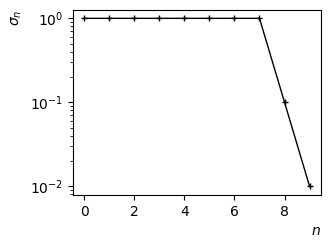

param| pos:[20,20,], iter: 0, loss: 5.000e-05, snr: -inf, grad: 0.000e+00: 100%|

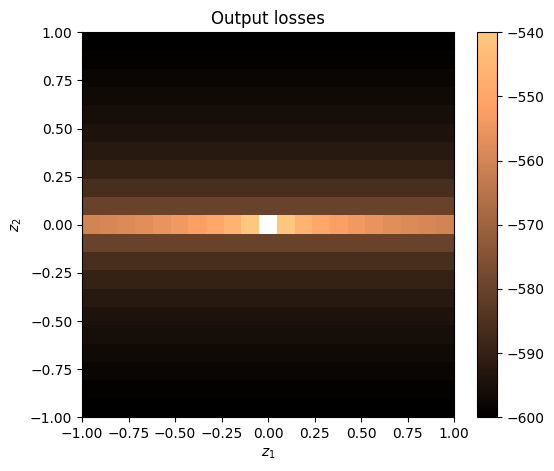

param| pos:[20,20,], iter: 0, loss: 5.000e-05, snr: -inf, grad: 0.000e+00: 100%|

In [2]:
# ########################################################
# ################# JACKPOT TEMPLATE #####################
# ########################################################

import torch
import jackpot as jc
from time import time

# ------------------------------------
# DIRECT MODEL (TO BE COMPLETED BY USER)
# ------------------------------------

# Device & dtype setup
device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float64
factory_kwargs = {"device": device, "dtype": dtype}
torch.manual_seed(0)

# Example: diagonal linear operator with shift
N = 1000
x_center = torch.randn((N,), **factory_kwargs)

A_diag = torch.ones(N, **factory_kwargs)
A_diag[0] = 1e-4
A_diag[1] = 1e-2

def Phi(x): 
    """Forward operator (replace with your own model)."""
    return A_diag * (x - x_center)

# Initial guess
x_est = x_center.clone()
# ------------------------------------


# ------------------------------------
# JACKPOT INITIALIZATION
# ------------------------------------
jack = jc.Jackpot(Phi, x_est, expe_name = "jupyter_tuto")

# Experiment name
jack.set_expe_name("tuto")

# Load/save options
jack.sing_load = False
jack.sing_save = not jack.sing_load
jack.adv_mani_load = False
jack.adv_mani_save = not jack.adv_mani_load 
jack.save_plots = True

# Jacobian singular spectrum parameters
jack.n_sing = 10
jack.sing_max_time = 3600

# Adversarial manifold parameters
jack.n_dim = 2
jack.epsilon = 1e-1
jack.n_discr_pts = 21
jack.grid_lengths = 1.0
# ------------------------------------


# ------------------------------------
# JACOBIAN SINGULAR SPECTRUM
# ------------------------------------
if jack.sing_load:
    jack.jac_spectrum_load()
else:
    jack.jac_spectrum_compute()  # method="lobpcg" optional
    if jack.sing_save:
        jack.jac_spectrum_save()

# Plot spectrum
jack.jac_spectrum_plot()
# ------------------------------------


# ------------------------------------
# ADVERSARIAL MANIFOLD
# ------------------------------------
if jack.adv_mani_load:
    jack.adv_manifold_load()
else:
    jack.adv_manifold_compute()
    if jack.adv_mani_save:
        jack.adv_manifold_save()

# Plot discrepancy
jack.plot_discrepancy(
    in_SNR=True,
    save_plot=jack.save_plots,
    levels=[20, 30, 40],
    color_levels=["g", "b", "r"],
)
# ------------------------------------

In [13]:
pip install -e ../src

Obtaining file:///home/munier/Documents/These/identifying_the_non_identifiable/codes/jackpot_gitlab/notebooks
ERROR: file:///home/munier/Documents/These/identifying_the_non_identifiable/codes/jackpot_gitlab/notebooks does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
Note: you may need to restart the kernel to use updated packages.


In [14]:
t1 = time()

In [15]:
time() -t1

0.10127377510070801